# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

In [0]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1.1 Create a two-dimensional vector and plot it on a graph

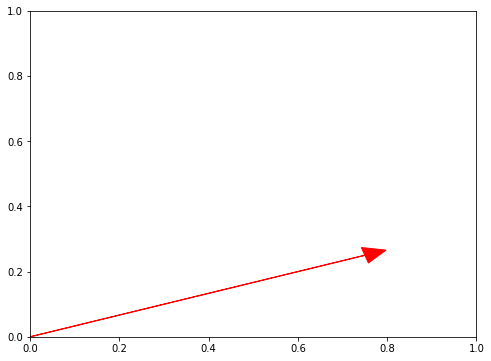

In [21]:
vec2 = [0.75, 0.25]

vectors = plt.figure(figsize = [8,6])
plt.arrow(0,0, vec2[0], vec2[1],head_width=.05, head_length=0.05, color ='red')

## 1.2 Create a three-dimensional vecor and plot it on a graph

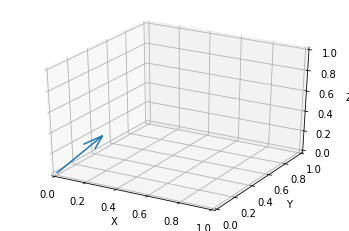

In [22]:
vec3 = np.array([0,0,0,0.25,0.1,0.4])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,0.25,0.1,0.4)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

In [23]:
from math import e, pi
print(e)
print(pi)

vec5 = np.multiply(vec2, 5)
vecpi = np.multiply(vec2, pi)
negvec = np.multiply(vec2, -e)

2.718281828459045
3.141592653589793


<Figure size 432x288 with 0 Axes>

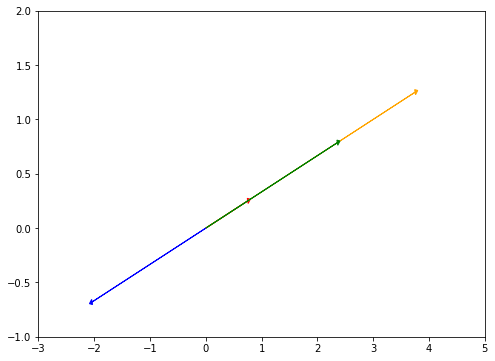

In [29]:
plt.figure()
vectors2 = plt.figure(figsize = [8,6])
plt.xlim(-3,5)
plt.ylim(-1,2)

plt.arrow(0,0, vec2[0], vec2[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec5[0], vec5[1],head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0,0, vecpi[0], vecpi[1],head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, negvec[0], negvec[1],head_width=.05, head_length=0.05, color ='blue')

# The vectors are collinear.

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

<Figure size 432x288 with 0 Axes>

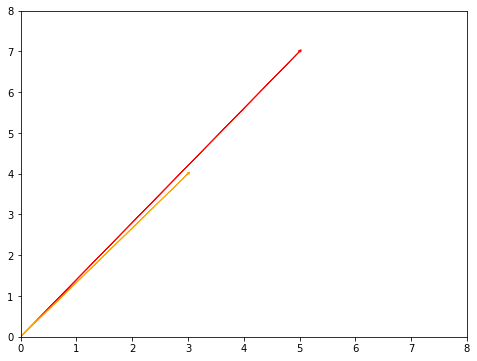

In [33]:
vec_a = np.array([5,7])
vec_b = np.array([3,4])

plt.figure()
vectors3 = plt.figure(figsize = [8,6])
plt.xlim(0,8)
plt.ylim(0,8)

plt.arrow(0,0, vec_a[0], vec_a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec_b[0], vec_b[1],head_width=.05, head_length=0.05, color ='orange')

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

<Figure size 432x288 with 0 Axes>

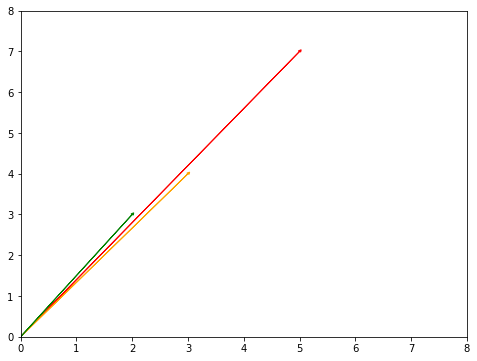

In [36]:
aminusb = vec_a - vec_b

plt.figure()
vectors3 = plt.figure(figsize = [8,6])
plt.xlim(0,8)
plt.ylim(0,8)

plt.arrow(0,0, vec_a[0], vec_a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec_b[0], vec_b[1],head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0,0, aminusb[0], aminusb[1],head_width=.05, head_length=0.05, color ='green')
plt.show()

# A minus b is roughly what you get when you attach a and b head to head.

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [38]:
vec_c = np.array([7,22,4,16])
vec_d = np.array([12,6,2,9])

np.dot(vec_c, vec_d)

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [43]:
vec_e = np.array([5,7,2])
vec_f = np.array([3,4,6])


np.cross(vec_e, vec_f)

array([ 34, -24,  -1])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [44]:
vec_g = np.array([1,1,1,8])
vec_h = np.array([3,3,3,3])

gnorm = np.linalg.norm(vec_g)
hnorm = np.linalg.norm(vec_h)
print(gnorm, hnorm)

8.18535277187245 6.0


# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [49]:
mat_a = np.matrix('1 2; 3 4; 5 6')
mat_b = np.matrix('2 4 6')
mat_c = np.matrix('9 6 3; 4 7 11')
mat_d = np.matrix('1 0 0; 0 1 0; 0 0 1')
mat_e = np.matrix('1 3; 5 7')

print(mat_a.shape)
print(mat_b.shape)
print(mat_c.shape)
print(mat_d.shape)
print(mat_e.shape)

# legal combinations: AC, AE, BA, BD, CA, CD, DA, EC

(3, 2)
(1, 3)
(2, 3)
(3, 3)
(2, 2)


## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [54]:
ceedee = np.matmul(mat_c, mat_d)
print(ceedee.shape)
print(ceedee)

ayeee = np.matmul(mat_a, mat_e)
print(ayeee.shape)
print(ayeee)

beeayy = np.matmul(mat_b, mat_a)
print(beeayy.shape)
print(beeayy)

# The dimensions of the resulting matrix are always equal to the number of rows in the first matrix and oolumns in the second.

(2, 3)
[[ 9  6  3]
 [ 4  7 11]]
(3, 2)
[[11 17]
 [23 37]
 [35 57]]
(1, 2)
[[44 56]]


## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [55]:
mat_f = np.matrix('20 19 18 17; 16 15 14 13; 12 11 10 9; 8 7 6 5; 4 3 2 1')
print(mat_f.transpose())

# Diagonal numbers remain in their original places. F's dimensions are 5x4, Ft's are 4x5

[[20 16 12  8  4]
 [19 15 11  7  3]
 [18 14 10  6  2]
 [17 13  9  5  1]]


# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [58]:
mat_g = np.matrix('12 11; 7 10')
eye2 = np.matrix('1 0; 0 1')

eyeg = np.matmul(mat_g, eye2)
print(eyeg)

[[12 11]
 [ 7 10]]


## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [60]:
mat_h = np.matrix('12 11; 7 10')
mat_j = np.matrix('0 1 2; 7 10 4; 3 2 0')

detH = np.linalg.det(mat_h)
print(detH)
detJ = np.linalg.det(mat_j)
print(detJ)

43.000000000000014
-19.999999999999996


## 3.3 Find $H^{-1}$ and then find $J^{-1}$

In [62]:
Hinv = np.linalg.inv(mat_h)
print(Hinv)
Jinv = np.linalg.inv(mat_j)
print(Jinv)

[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]
[[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $J^{-1}J$. Is $HH^{-1} == J^{-1}J$? Why or Why not?

In [64]:
H_Hinv = np.matmul(mat_h, Hinv)
print(H_Hinv)
Jinv_J = np.matmul(Jinv, mat_j)
print(Jinv_J)

# The two are not equal. The outputs are both identity matrices, but one is two-dimensional and the other is three-dimensional.

[[1.00000000e+00 5.55111512e-16]
 [2.22044605e-16 1.00000000e+00]]
[[ 1.00000000e+00  2.22044605e-16  0.00000000e+00]
 [-1.11022302e-16  1.00000000e+00  0.00000000e+00]
 [-1.66533454e-16 -1.11022302e-16  1.00000000e+00]]


# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?



In [0]:
def dottie(vector1, vector2): # Dot product function
  
  sumval = 0
  for i in range(0,len(vector1)):
    sumval = sumval + (vector1[i]*vector2[i])
    
  return sumval

In [70]:
print(dottie(vec_a, vec_b))
print(np.dot(vec_a, vec_b))

43
43


In [0]:
def norman_supremum(vector, L=2): # Norm function for any given norm
  expo = [element**L for element in vector]
  norm = (sum(expo))**(1/L)
  return norm

In [89]:
norman_supremum(vec_a, 5)

7.242861418595355

In [91]:
print(mat_e)

[[1 3]
 [5 7]]


-7.999999999999998

<Figure size 432x288 with 0 Axes>

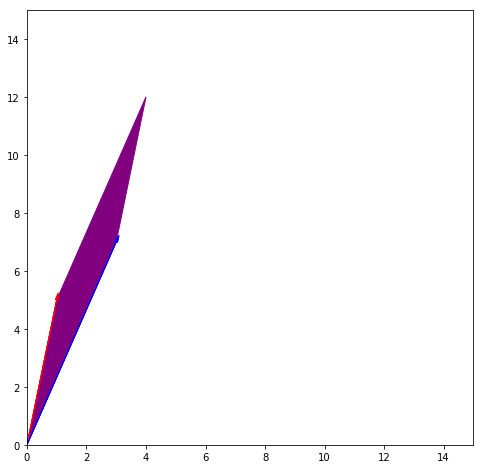

In [98]:
# 2d matrix plot 

plt.figure()
matrix1 = plt.figure(figsize = [8,8])
plt.xlim(0,15)
plt.ylim(0,15)

plt.arrow(0,0, mat_e[0,0], mat_e[1,0], head_width=.1, head_length=.25, color = "red")
plt.arrow(0,0, mat_e[0,1], mat_e[1,1], head_width=.1, head_length=.25, color = "blue")
plt.fill([0,1,4,3],[0,5,12,7], color = 'purple')

np.linalg.det(mat_e)
# The determinant represents the area/volume/hypervolume of the parallelogram/parallelepiped/hyperthing defined by the vectors.